In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, f1_score
import numpy as np

In [2]:
# Define image dimensions for upscaling/downscaling
input_shape = (224, 224, 3)
num_classes = 4  # Number of classes in dataset
batch_size = 32
epochs = 70  # Adjust as needed
validation_split = 0.2

In [3]:
# Data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=validation_split
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [4]:
# Load the dataset and split it into training and validation sets
train_generator = train_datagen.flow_from_directory(
    '../Data/images/train',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle = True,
    seed = 42
)

validation_generator = train_datagen.flow_from_directory(
    '../Data/images/train',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle = False,
    seed = 42
)

Found 16864 images belonging to 4 classes.
Found 4213 images belonging to 4 classes.


In [5]:
class_weights = {}
for i in range(num_classes):
    class_weights[i] = len(train_generator.classes) / (num_classes * np.bincount(train_generator.classes)[i])


In [6]:
# Create a test data generator
test_generator = test_datagen.flow_from_directory(
    '../Data/images/test',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 5140 images belonging to 4 classes.


In [7]:
# Create MobileNet model with increased complexity
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2023-10-10 17:01:39.389463: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-10 17:01:39.413602: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-10 17:01:39.413849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-10 17:01:39.414402: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weights

)

Epoch 1/70


2023-10-10 17:01:43.980661: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500
2023-10-10 17:01:44.290892: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-10 17:01:44.886788: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-10-10 17:01:44.886824: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-10-10 17:01:44.912036: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate

527/527 [==============================] - 133s 233ms/step - loss: 1.1222 - accuracy: 0.5342 - val_loss: 1.0854 - val_accuracy: 0.5320
Epoch 2/70
527/527 [==============================] - 125s 237ms/step - loss: 0.9174 - accuracy: 0.6417 - val_loss: 0.8486 - val_accuracy: 0.6400
Epoch 3/70
527/527 [==============================] - 125s 237ms/step - loss: 0.8648 - accuracy: 0.6657 - val_loss: 0.8639 - val_accuracy: 0.6424
Epoch 4/70
527/527 [==============================] - 124s 235ms/step - loss: 0.8287 - accuracy: 0.6856 - val_loss: 0.9127 - val_accuracy: 0.6324
Epoch 5/70
527/527 [==============================] - 124s 235ms/step - loss: 0.8015 - accuracy: 0.6984 - val_loss: 0.9155 - val_accuracy: 0.6322
Epoch 6/70
527/527 [==============================] - 124s 236ms/step - loss: 0.7781 - accuracy: 0.7051 - val_loss: 0.7430 - val_accuracy: 0.7056
Epoch 7/70
527/527 [==============================] - 124s 236ms/step - loss: 0.7504 - accuracy: 0.7175 - val_loss: 0.8089 - val_accura

Epoch 57/70
527/527 [==============================] - 129s 245ms/step - loss: 0.2126 - accuracy: 0.9267 - val_loss: 1.0617 - val_accuracy: 0.7219
Epoch 58/70
527/527 [==============================] - 130s 246ms/step - loss: 0.2152 - accuracy: 0.9252 - val_loss: 0.9836 - val_accuracy: 0.7285
Epoch 59/70
527/527 [==============================] - 127s 242ms/step - loss: 0.2026 - accuracy: 0.9325 - val_loss: 1.0457 - val_accuracy: 0.7142
Epoch 60/70
527/527 [==============================] - 121s 229ms/step - loss: 0.2006 - accuracy: 0.9293 - val_loss: 1.0304 - val_accuracy: 0.7264
Epoch 61/70
527/527 [==============================] - 121s 229ms/step - loss: 0.1955 - accuracy: 0.9308 - val_loss: 1.0695 - val_accuracy: 0.7281
Epoch 62/70
527/527 [==============================] - 122s 231ms/step - loss: 0.2007 - accuracy: 0.9290 - val_loss: 1.0508 - val_accuracy: 0.7233
Epoch 63/70
527/527 [==============================] - 122s 232ms/step - loss: 0.1920 - accuracy: 0.9354 - val_loss: 1

In [9]:
# Predict the labels for the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')
classification_rep = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices)


print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Classification Report:\n", classification_rep)

161/161 [==============================] - 7s 39ms/step
Accuracy: 0.7538910505836576
F1 Score: 0.7545445409520748
Classification Report:
               precision    recall  f1-score   support

       angry       0.77      0.63      0.69       960
       happy       0.91      0.91      0.91      1825
     neutral       0.69      0.64      0.67      1216
         sad       0.60      0.73      0.66      1139

    accuracy                           0.75      5140
   macro avg       0.74      0.73      0.73      5140
weighted avg       0.76      0.75      0.75      5140



In [16]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("../Deployment/Version 2.0/Emotion_detector.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("../Deployment/Version 2.0/Emotion_detector.h5")

In [26]:
# Load the model architecture from the JSON file
with open("../Deployment/Version 2.0/Emotion_detector.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load the model weights from the HDF5 file
loaded_model.load_weights("../Deployment/Version 2.0/Emotion_detector.h5")

# Compile the loaded model with the same configuration as before
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Get the class labels for the test data
class_labels = list(test_generator.class_indices.keys())


1/1 [==============================] - 0s 244ms/step


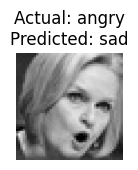

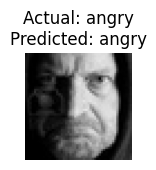

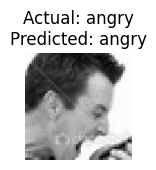

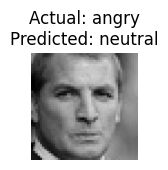

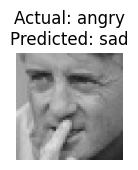

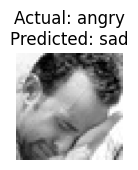

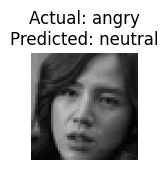

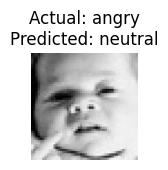

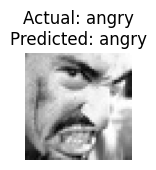

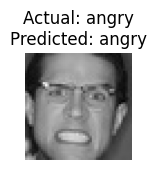

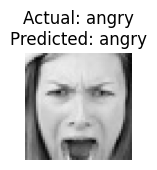

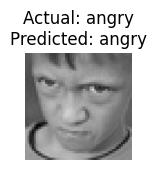

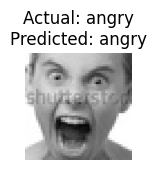

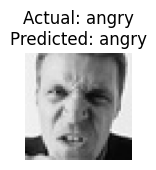

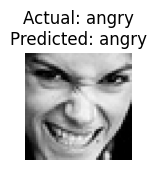

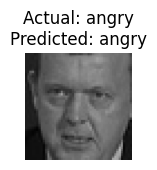

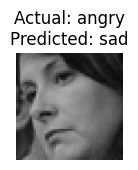

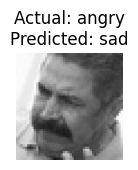

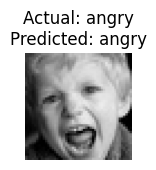

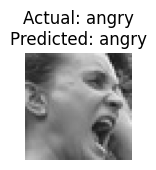

In [27]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Function to load and preprocess an image
def load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img / 255.0  # Rescale the pixel values
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    return img

# Get a batch of images and labels from the test generator
batch_size = 20
images, labels = test_generator.next()

# Get the class labels for the test data
class_labels = list(test_generator.class_indices.keys())

# Make predictions on the batch of images
predictions = loaded_model.predict(images)



# Display up to 20 images with their actual and predicted labels
num_images_to_display = min(batch_size, 20)
for i in range(num_images_to_display):
    actual_label = class_labels[np.argmax(labels[i])]
    predicted_label = class_labels[np.argmax(predictions[i])]

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

    # Display actual and predicted labels
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")

plt.show()
